In [27]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

## functions

In [2]:
def normpdf(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

In [3]:
def normcdf(x, mu, sigma, alpha=1):
    return 0.5 * (1 + erf(alpha * (x - mu) / (sigma * np.sqrt(2))))

In [4]:
def skewed(x, mu, sigma, alpha, a):
    return a * normpdf(x, mu, sigma) * normcdf(x, mu, sigma, alpha)

In [31]:
def make_chromato(t, pics, noise=0.05):

    chromato = np.zeros(t.shape)
    for amp, mu, sigma in pics:
        chromato += skewed(t, mu, sigma, alpha=2, a=amp)
        # chromato += amp * normpdf(t, mu, sigma)
    
    chromato += np.random.normal(loc=0, scale=noise, size=t.shape)
    
    return chromato

In [32]:
tps = np.linspace(0, 15, 1000)

In [33]:
spectre = make_chromato(tps, [(1, 3.5, 0.1), (3, 4.5, 0.1), (2, 6.5, 0.1)])

(0, 15)

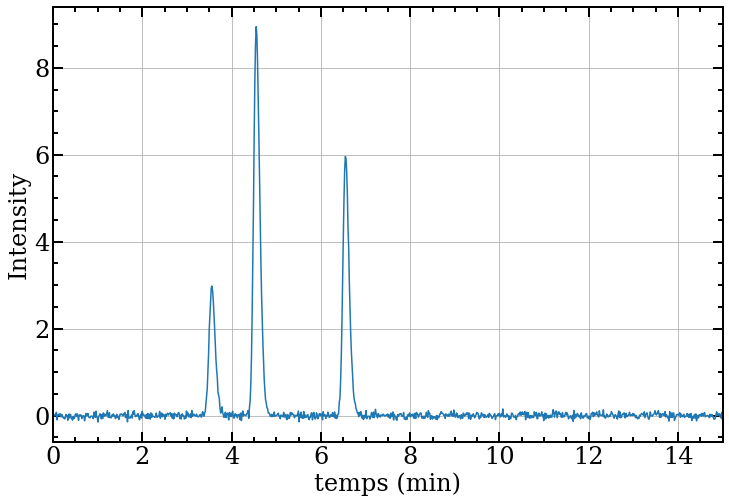

In [37]:
plt.style.use("publi")
plt.figure(figsize=(12, 8))
plt.plot(tps, spectre)
plt.ylabel("Intensity")
plt.xlabel("temps (min)")
plt.xlim(0, 15)

In [56]:
np.random.uniform(3., 4., size=3
                )

array([3.41240488, 3.61904163, 3.44551275])

In [38]:
import plotly.express as px

In [54]:
fig = px.line(x=tps, y=spectre, range_x=(0, 15), 
        title="Chromatogramme XXXX", 
        labels={"x": "temps (min)", "y": "Intensité"},
       template="plotly_white")
fig.update_layout(font=dict(
        #family="Arial",
        size=20,
        color="#7f7f7f"
    ))